In [1]:
!pip install google-play-scraper requests nltk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 1.6 MB/s eta 0:00:00


In [ ]:
from google_play_scraper import app, Sort, reviews_all
import pandas as pd


# App ID (you can find this in the app's URL on the Play Store)
app_id = 'com.sadapay.app'  # Replace with the actual app ID

# Scrape reviews
try:
    result = reviews_all(
        app_id,
        sleep_milliseconds=50,  # You might want to adjust this to avoid getting blocked
        lang='en',
        country='us',
        sort=Sort.NEWEST
    )
    print(f"Successfully scraped reviews for app: {app_id}")
except Exception as e:
    print(f"Error scraping reviews: {e}")


Successfully scraped reviews for app: com.sadapay.app


In [ ]:
len(result)

32965

In [ ]:
result

[{'reviewId': '4b7230da-5e04-4d16-9282-a66e96268fc1',
  'userName': 'A Google user',
  'userImage': 'https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g',
  'content': 'Good experience with Sadapay❤️',
  'score': 5,
  'thumbsUpCount': 0,
  'reviewCreatedVersion': '0.1.10762',
  'at': datetime.datetime(2024, 10, 12, 15, 37, 3),
  'replyContent': None,
  'repliedAt': None,
  'appVersion': '0.1.10762'},
 {'reviewId': 'cedca28d-1f51-4217-9e82-10bc2697dbc9',
  'userName': 'A Google user',
  'userImage': 'https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g',
  'content': 'Very nice health service I love ❤ the speed of transactions',
  'score': 5,
  'thumbsUpCount': 0,
  'reviewCreatedVersion': None,
  'at': datetime.datetime(2024, 10, 12, 15, 35, 8),
  'replyContent': None,
  'repliedAt': None,
  'appVersion': None},
 {'reviewId': '30061ab2-4eae-4685-8358-

In [ ]:
data_list = []
for i in result:
  print(i['content'])
  data_list.append(i['content'])

Streaming output truncated to the last 5000 lines.
Outstanding experience with sadapay
Best app ever used.
Best sadapay app
Impressed by this app
Very Helpful and ontime reply. The staff is very impressive
Nice, very useful apk
Very nice response Good app
Such a Nice app ♥️🍁 Appreciate to Sada pay team and Thanks allot this is best app which we student are using
Well Done 👍 Great facilities providing us, I appreciated.
Good experience
Very good app
Great
One of the best transaction app easy to use i liked it 💓💜❤
It's a good app my experience with it so far is quite good. Signing up is so simple way better than Naya pay. debit card delivered in 4 days work perfectly for international transactions which is i like the most bc other local apps like jazz cash and easypaisa don't offer that. Withdrawal limit was disappointing like only 10k in one day tho it's not the app problem it's because of state bank of Pakistan orders. 3 free transactions in months thumbs up to sadapay 👍
Got my debit c

In [ ]:
import pandas as pd

df = pd.DataFrame(data_list,columns=["Reviews"] )
df.head()

Reviews
0                     Good experience with Sadapay❤️
1  Very nice health service I love ❤ the speed of...
2   Sadapay has one thing Missing loan for customer.
3                                              Great
4                                               Good

In [ ]:
print(df.tail(20))

                                                 Reviews
32945     Easy to use and can do international payments.
32946  Awesome service, awesome chat support, super f...
32947  Too much Sada for now ( which isn't sada when ...
32948  Not a fan of banking apps in Pakistan but I mu...
32949  Been waiting for Account creation invite for a...
32950       Amazing App, best digital wallet of Pakistan
32951     Seamless onboarding and great user experience.
32952           Great UI. Account opens within minutes 😁
32953  Its been 2 years still no account activation. ...
32954                               It seems to be good.
32955                                                 🤫🥰
32956                                               Scam
32957                            Best financial services
32958                     Quick and seamless experience!
32959  Amazing custumer service and bestest payment a...
32960  I have been on waitlist for 2 years now, pathe...
32961             Can i pay to 

In [ ]:
# prompt: we need to clean our data from emoji, and remove all empty rows after the removal of emoji, remove (🤫🥰 ) these too

import re

def remove_emoji(text):
  emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
  return emoji_pattern.sub(r'', text)

# Assuming you have your DataFrame 'df' with a column named 'Reviews'

df['Reviews'] = df['Reviews'].apply(lambda x: remove_emoji(x))
df['Reviews'] = df['Reviews'].str.replace(r'\(🤫🥰\)', '', regex=True)

# Remove rows where the 'Reviews' column is empty after cleaning
df = df[df['Reviews'].str.len() > 0]

print(df.tail(20))


                                                 Reviews
32945     Easy to use and can do international payments.
32946  Awesome service, awesome chat support, super f...
32947  Too much Sada for now ( which isn't sada when ...
32948  Not a fan of banking apps in Pakistan but I mu...
32949  Been waiting for Account creation invite for a...
32950       Amazing App, best digital wallet of Pakistan
32951     Seamless onboarding and great user experience.
32952            Great UI. Account opens within minutes 
32953  Its been 2 years still no account activation. ...
32954                               It seems to be good.
32955                                                 🤫🥰
32956                                               Scam
32957                            Best financial services
32958                     Quick and seamless experience!
32959  Amazing custumer service and bestest payment a...
32960  I have been on waitlist for 2 years now, pathe...
32961             Can i pay to 

In [ ]:
for i in df.Reviews:
  print(i)

Streaming output truncated to the last 5000 lines.
working rate is fast and good 
Excellent customer service and perfect app solution for day to day banking. 
Best
That's what we need 
achi apps hai but ...
I will give 3 star only because I added 10 people in 2 days but still my card is not generated. 
One of the most useful app ! If we compare with other wallets app ! No doubt this wallet app Sada Pay is perfect
Very easy ooo good to use .I love this I received today and active now ..mind blowing so Amazing
Sadapay is a digital beauty account. I have done shopping easily on AliExpress from my friend's account through it. Now I have created my account. I have invited 12 people through my account but still waiting list. It is not right. I request the team to remove me from the waitlist and expedite it.
Well very sada to do payment.. loving it 
Nazish ni bat ni ki but baqi good hai
It is a great app . And also there service are very easy and there 24/7 help option is awesome and they rep

In [ ]:
from transformers import pipeline
model_path = "cardiffnlp/twitter-roberta-base-sentiment-latest"
sentiment_task = pipeline("sentiment-analysis",device = 0,  model=model_path, tokenizer=model_path)
sentiment_task("Covid cases are increasing fast!")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/929 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/501M [00:00<?, ?B/s]

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


[{'label': 'negative', 'score': 0.7235766649246216}]

In [ ]:
sentiment_task("AI is great to work on")[0]['label']

'positive'

In [ ]:
label = []
try:
  for i in df.Reviews:
    print(i," --- " , sentiment_task(i)[0]['label'])
    label.append(sentiment_task(i)[0]['label'])

except Exception as e:
  print(e)

You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


Good experience with Sadapay  ---  positive
Very nice health service I love  the speed of transactions  ---  positive
Sadapay has one thing Missing loan for customer.  ---  negative
Great  ---  positive
Good  ---  positive
Very easy to use... Nice for international payments!  ---  positive
Very slow  ---  negative
Best service  ---  positive
Beautiful App  ---  positive
SadaPay app is very good I am very happy to use it and it doesn't charge any money for any transaction excellent service  ---  positive
Nice one  ---  positive
This is so good  ---  positive
Nice  ---  positive
I am using both applications sada pay and Naya pay. But I highly recommended SadaPay. Because SadaPay tax & gat charges lower than Naya pay. SadaPay doesn't block your card like NayaPay when you have not any payment in account and Google auto charged it. So this is a reason. I am using it up to 6 months+ it's very good applications and very good interface UI.  ---  positive
Nice  ---  positive
I've used many appl

In [ ]:
len(label)

3997

In [ ]:
#With GPU
len(label)

3997

In [ ]:
# prompt: shrink our df to 3043 row

min_len = min(len(df), len(label))

# Slice both the DataFrame and the label list to the minimum length
df = df.iloc[:min_len]
label = label[:min_len]

# Now assign the sliced label list to the DataFrame
df["label"] = label


In [ ]:
df.head()

Reviews     label
0                       Good experience with Sadapay  positive
1  Very nice health service I love  the speed of ...  positive
2   Sadapay has one thing Missing loan for customer.  negative
3                                              Great  positive
4                                               Good  positive

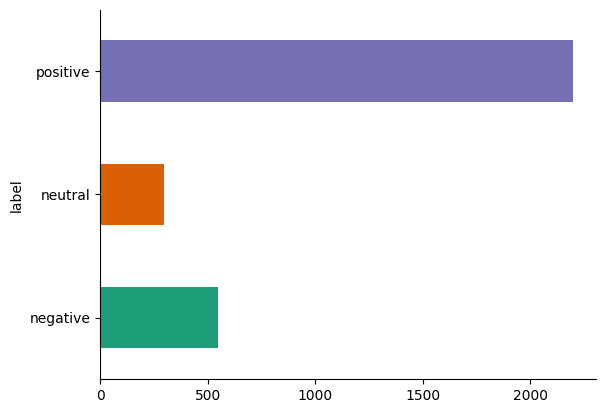

In [ ]:
# @title label

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

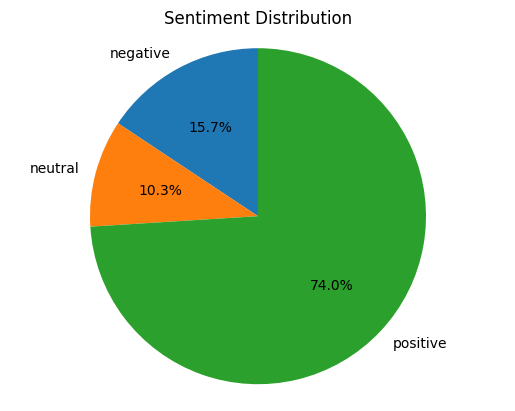

In [ ]:
# prompt: create a chart in % to show positve negitive and neutral

import matplotlib.pyplot as plt

# Calculate the percentage of each label
label_counts = df.groupby('label').size()
label_percentages = (label_counts / len(df)) * 100

# Create a pie chart
plt.pie(label_percentages, labels=label_percentages.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Sentiment Distribution')
plt.show()


# Tpoic Modeling Using Top2vec

In [4]:
!pip install top2vec
!pip install top2vec[sentence_encoders]


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 34.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 34.1 MB/s eta 0:00:00


In [ ]:
data = list(df.Reviews)

In [ ]:

from top2vec import Top2Vec

model = Top2Vec(documents=data, speed="fast-learn", workers=8)


2024-10-13 15:59:56,802 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
2024-10-13 15:59:56,911 - top2vec - INFO - Downloading universal-sentence-encoder-multilingual model
INFO:top2vec:Downloading universal-sentence-encoder-multilingual model
2024-10-13 16:00:16,079 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2024-10-13 16:00:23,023 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2024-10-13 16:01:11,243 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2024-10-13 16:01:11,370 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics


In [ ]:
model.get_num_topics()

34

In [ ]:
topic_sizes, topic_nums = model.get_topic_sizes()

In [ ]:
topic_sizes

array([312, 236, 224, 166, 159, 152, 142, 124, 105,  94,  86,  83,  80,
        80,  73,  72,  70,  69,  64,  61,  60,  59,  59,  50,  44,  41,
        41,  41,  37,  35,  35,  34,  28,  27])

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35])

In [ ]:
documents, document_scores, document_ids = model.search_documents_by_topic(topic_num=5, num_docs=15)
for i in documents:
  print(i)
  print(" ")

Good experience
 
Good experience
 
Good experience
 
Good experience
 
Good experience
 
Good experience
 
Good experience
 
Good experience
 
Good experience
 
Good experience
 
Good experience
 
Good experience
 
Good experience
 
Good experience
 
Good experience
 


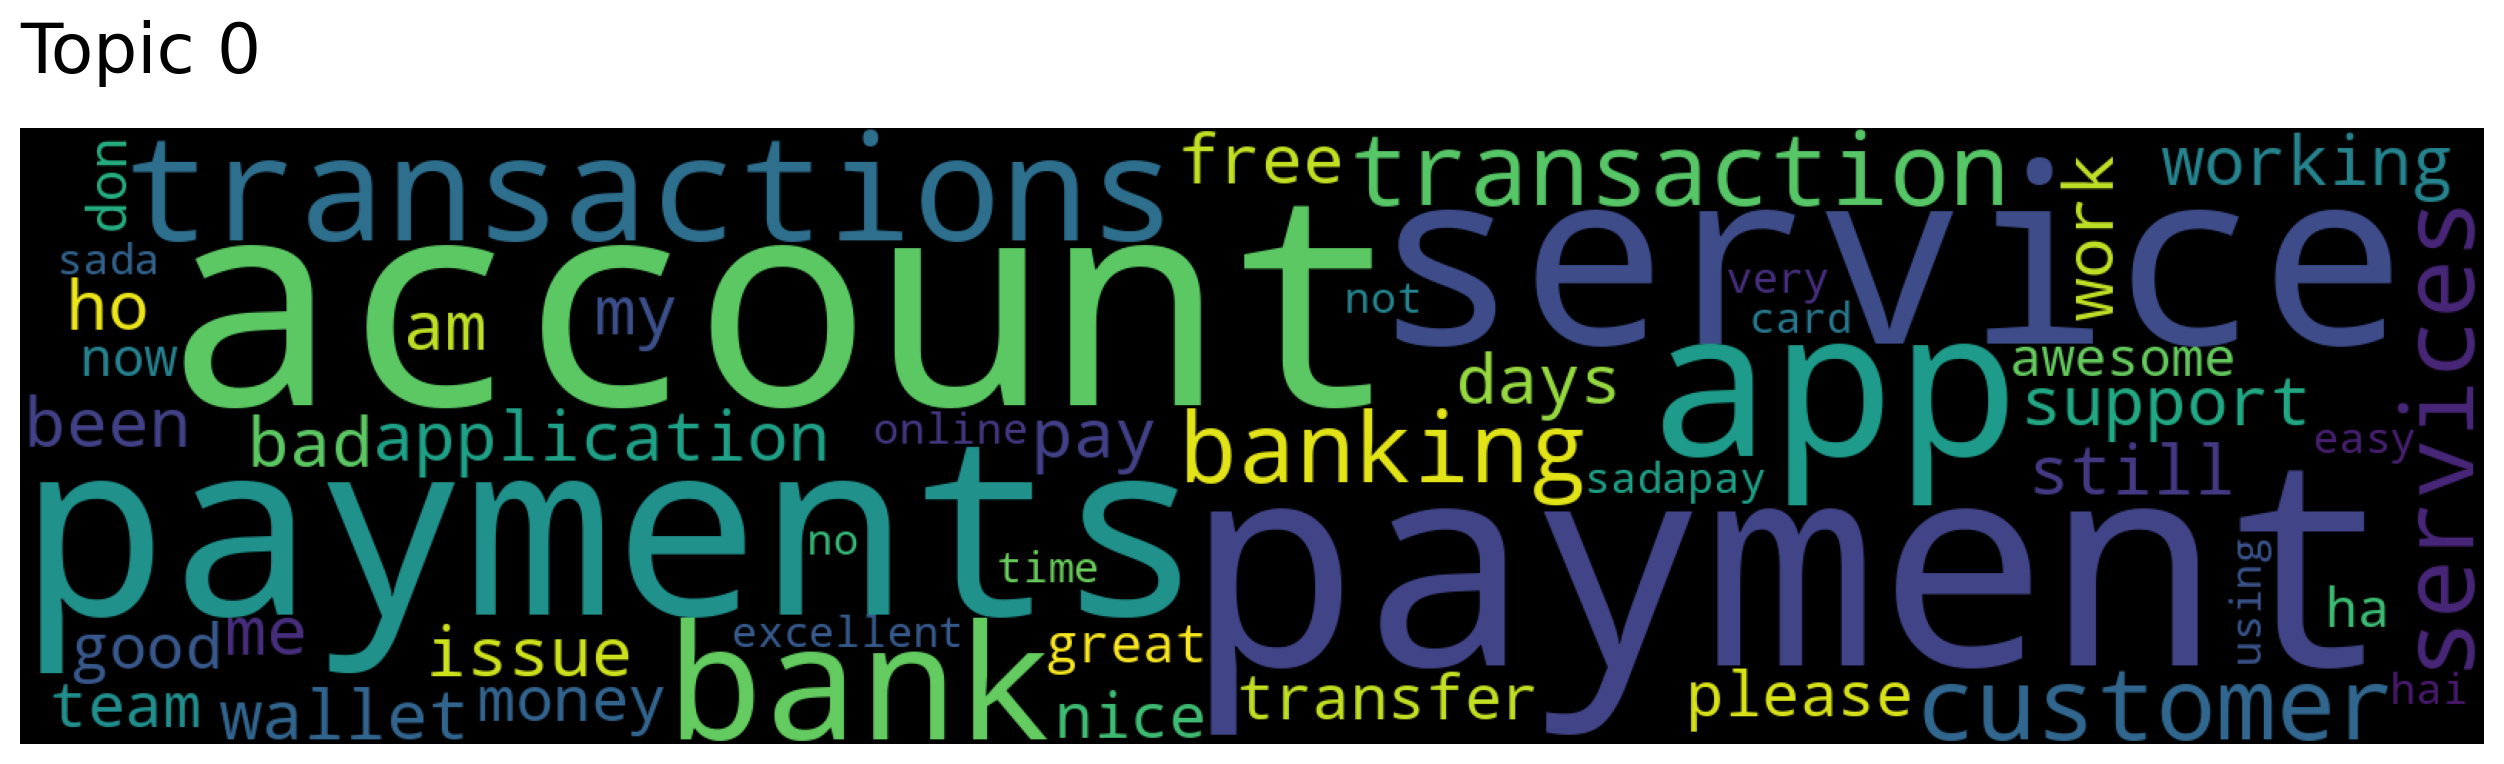

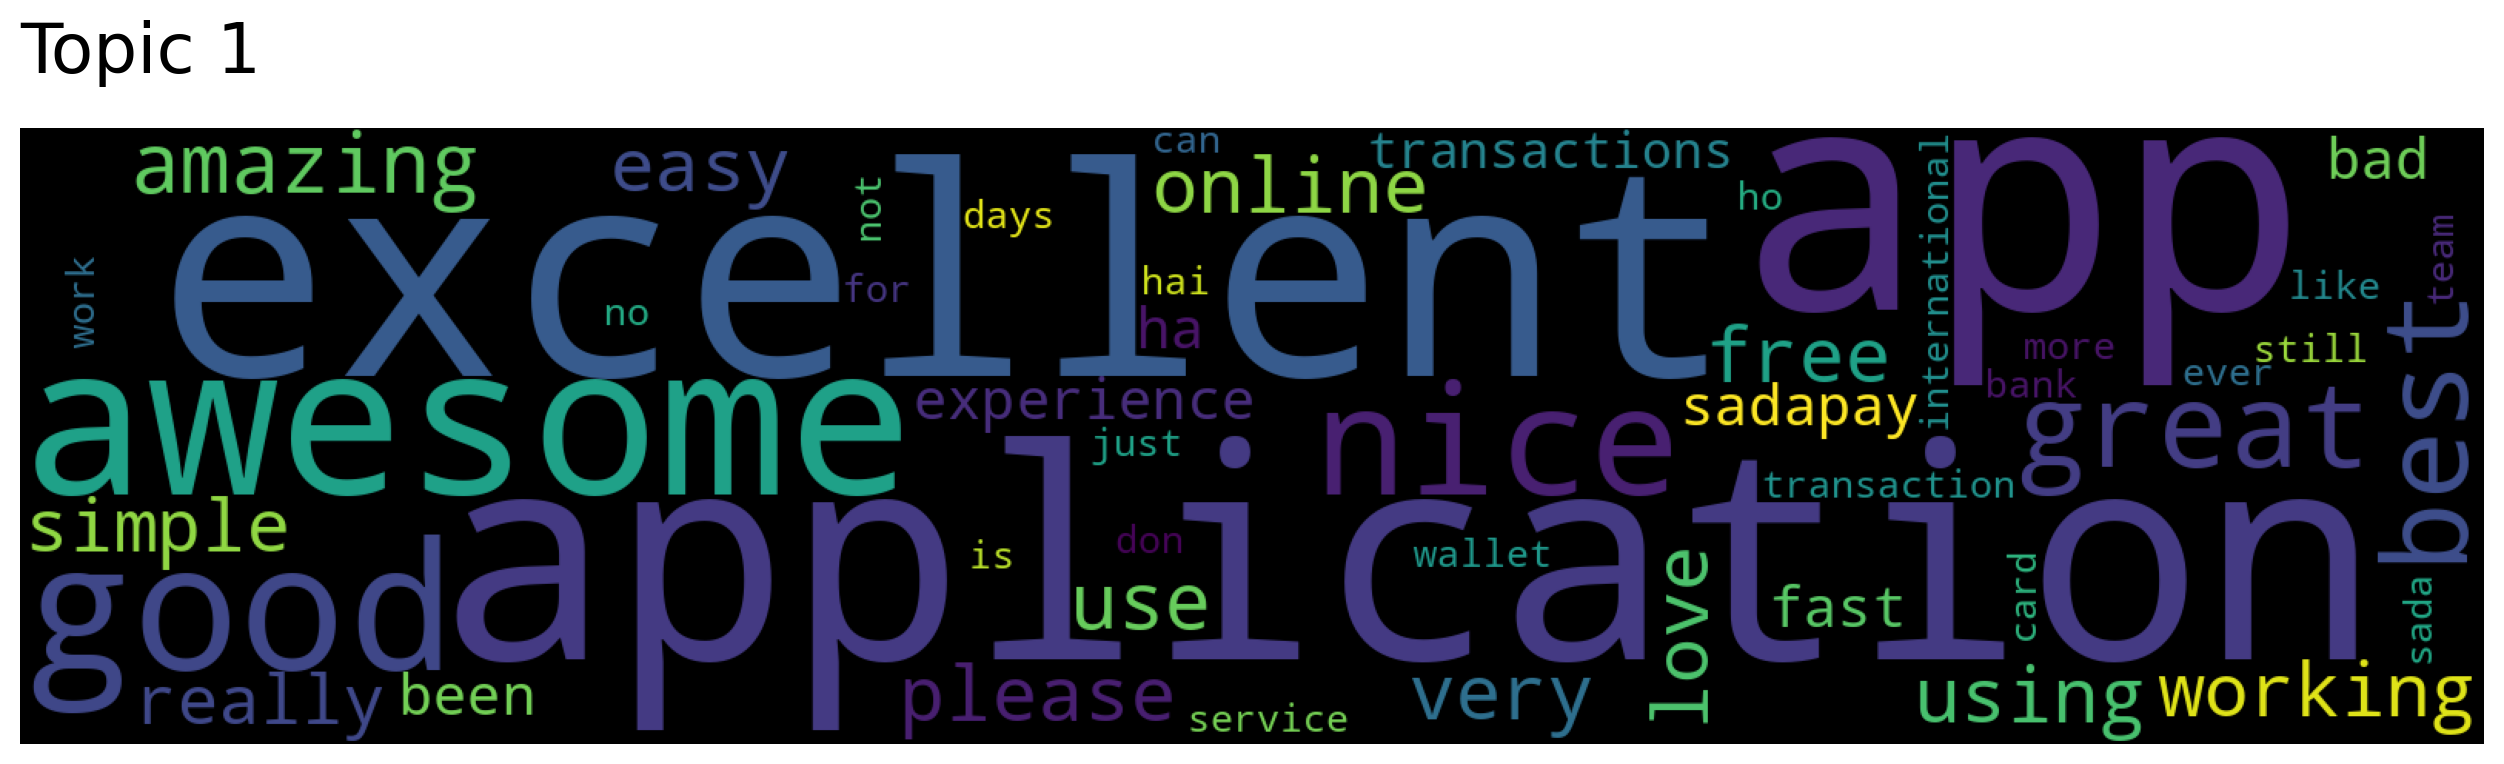

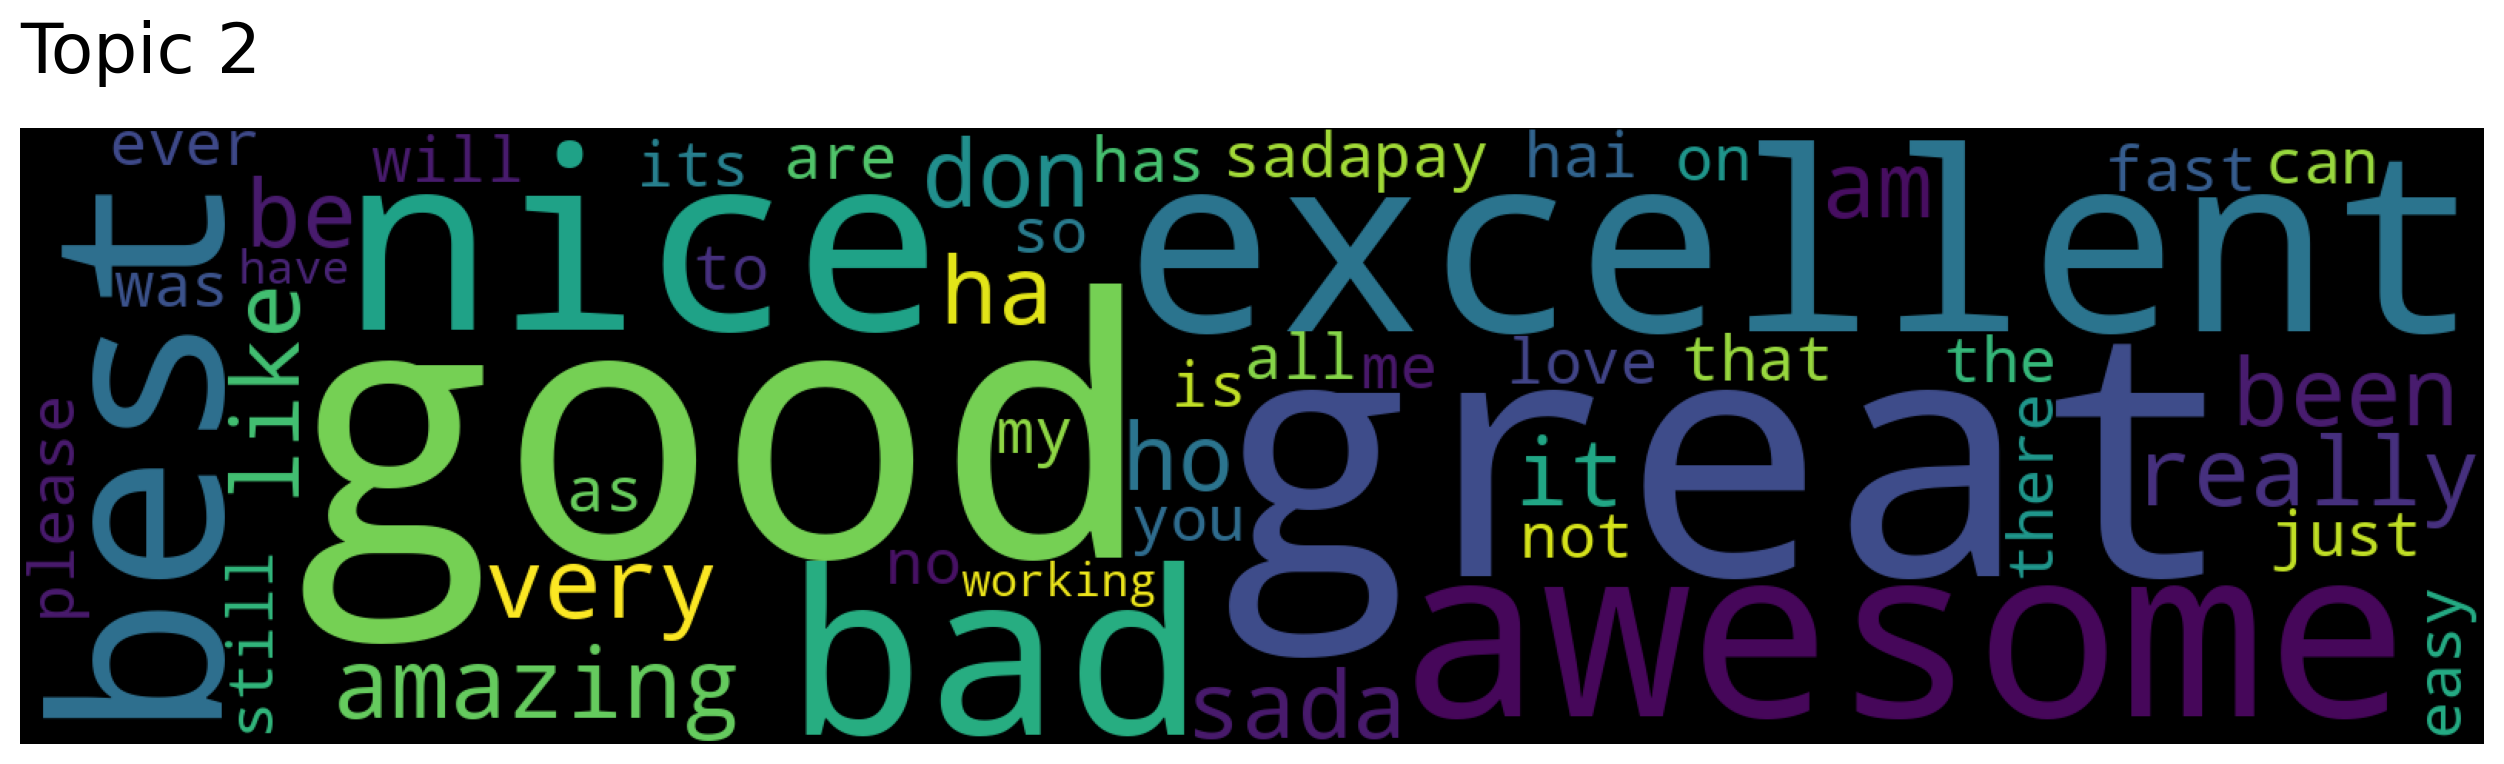

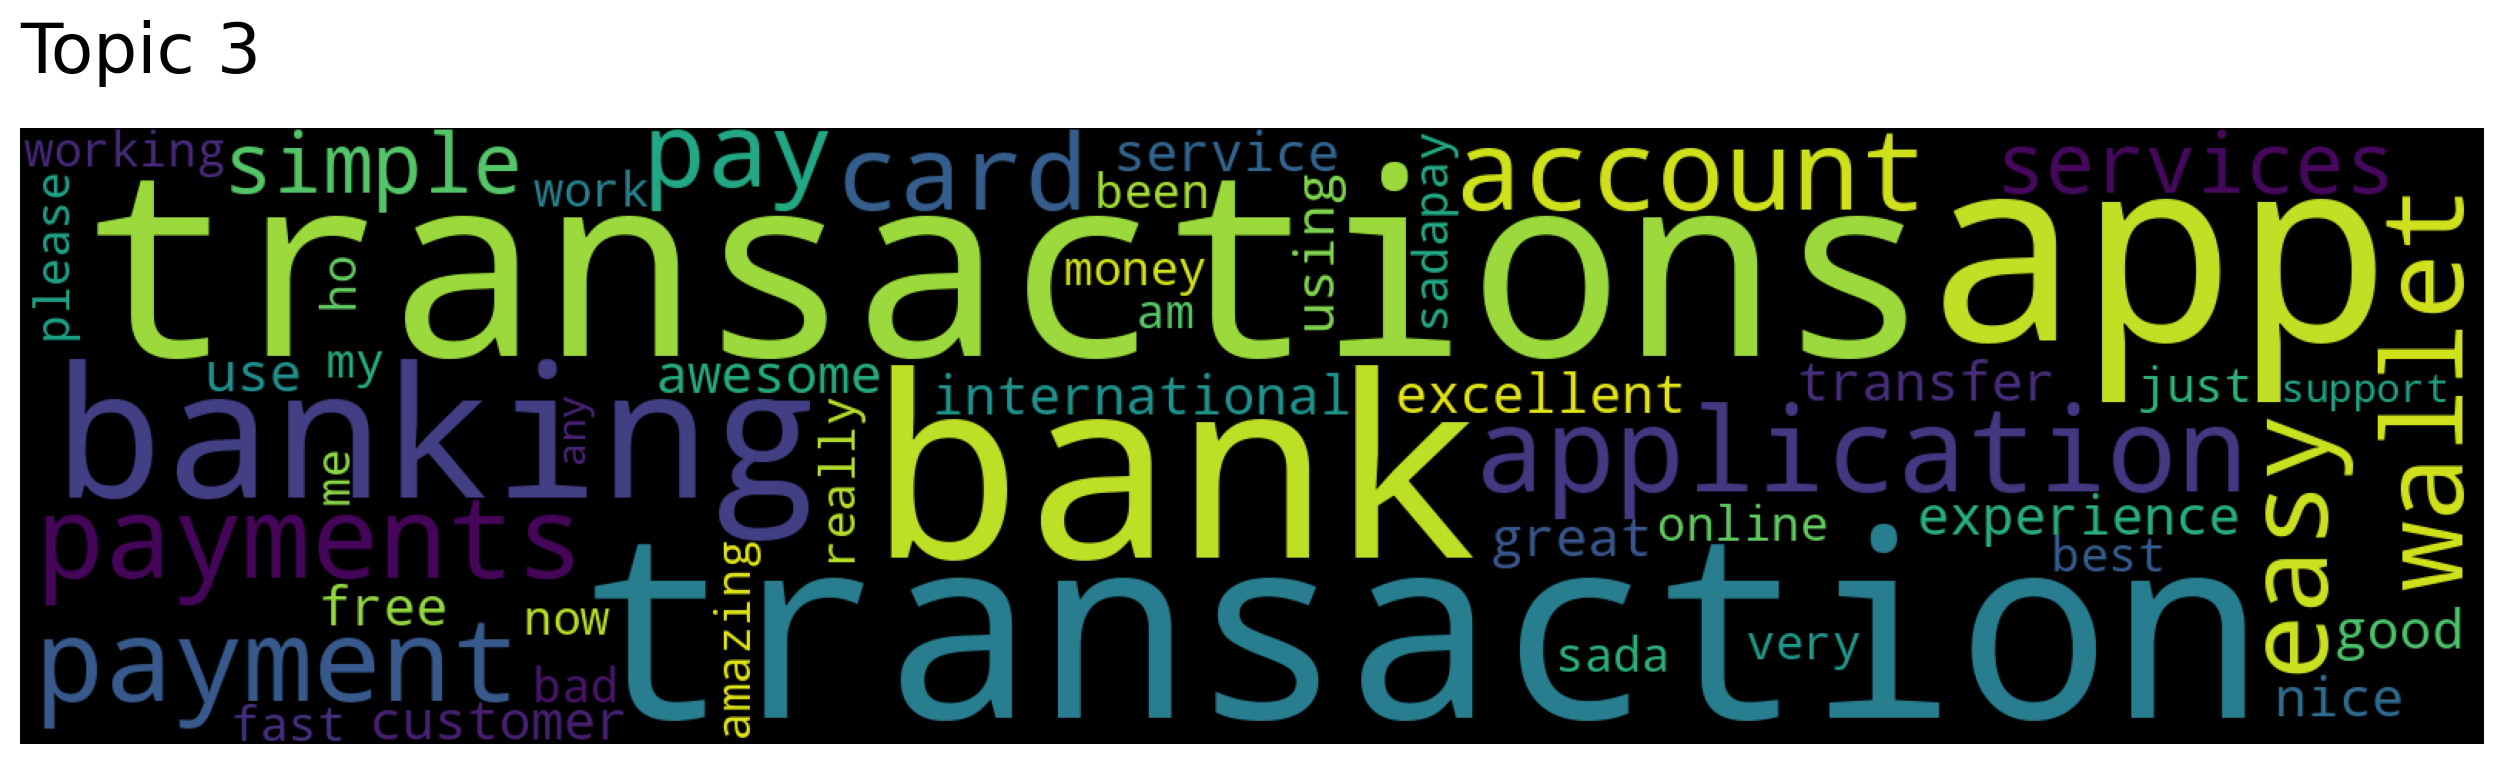

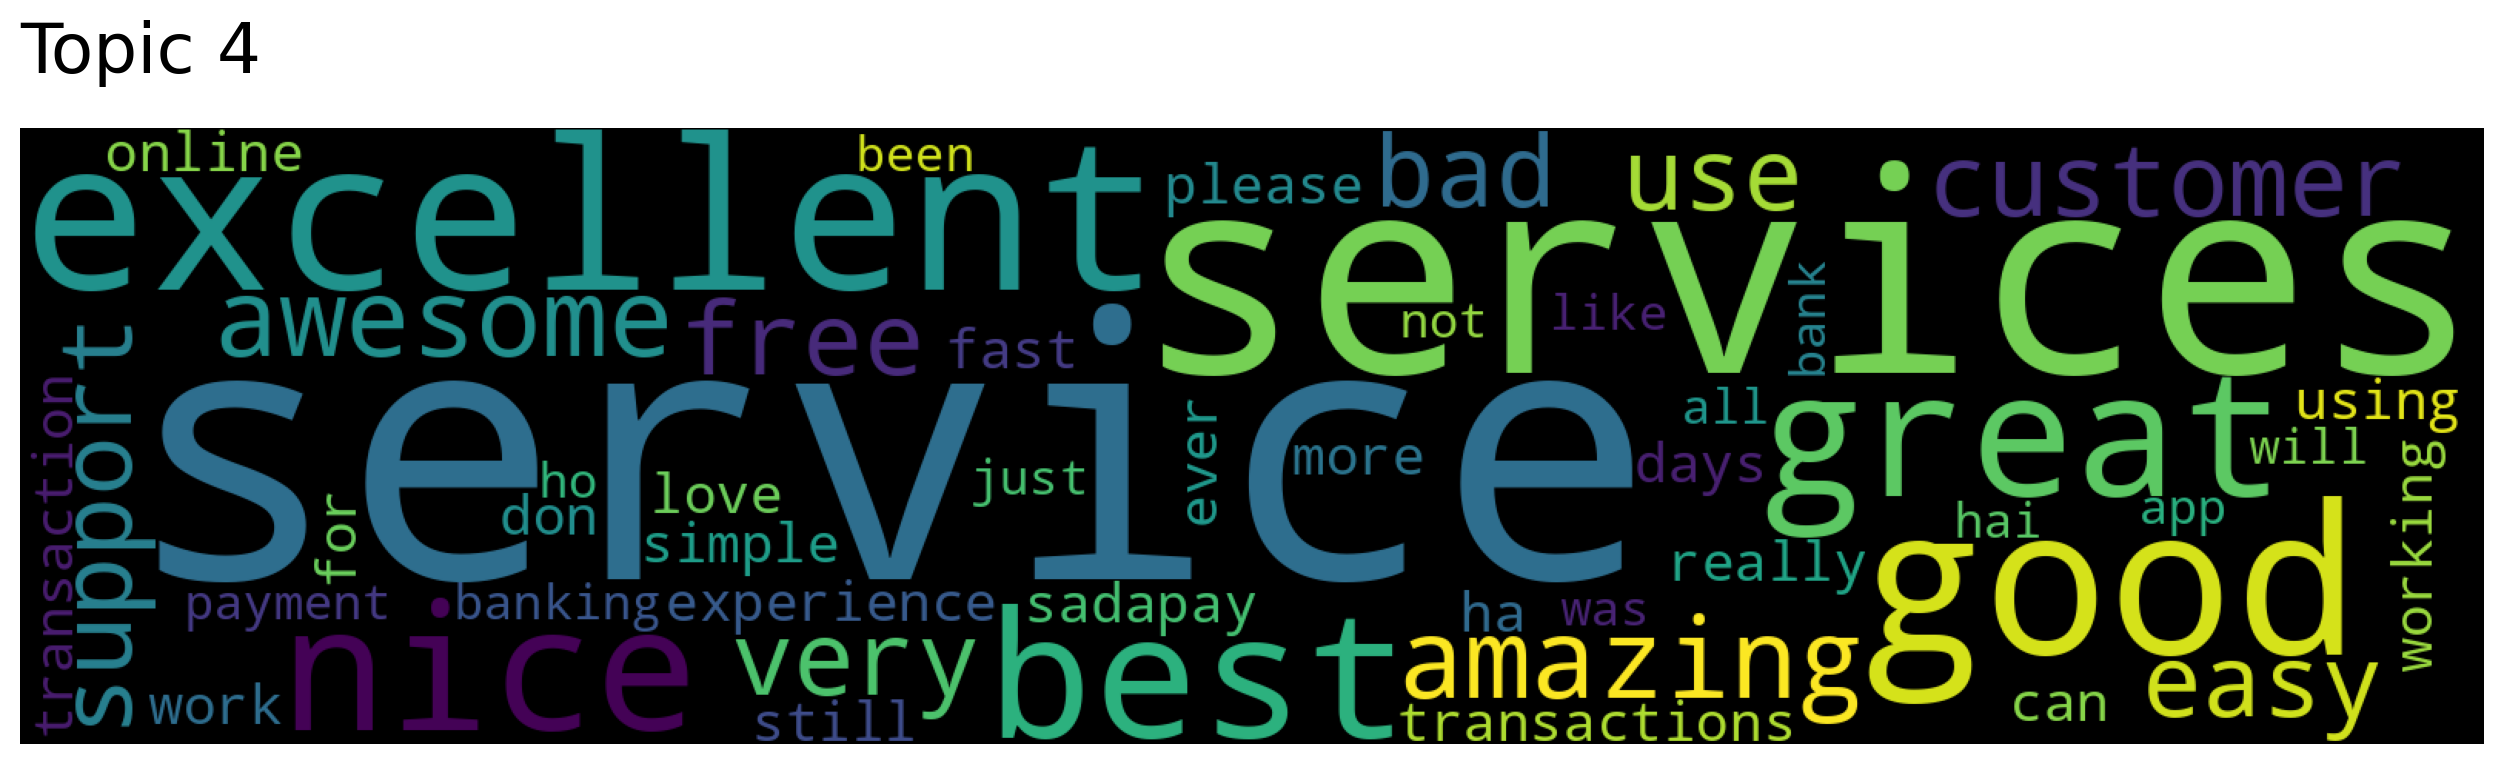

In [ ]:
for i in range(5):
  model.generate_topic_wordcloud(i)

# Gradio UI for App sentiment and topic modeling

In [ ]:
from google_play_scraper import app, Sort, reviews_all
import pandas as pd

def scrape_reviews(app_id):
  # App ID (you can find this in the app's URL on the Play Store)
  #app_id = 'com.sadapay.app'  # Replace with the actual app ID
  result = []
  # Scrape reviews
  try:
      result = reviews_all(
          app_id,
          sleep_milliseconds=50,  # You might want to adjust this to avoid getting blocked
          lang='en',
          country='us',
          sort=Sort.NEWEST
      )
      print(f"Successfully scraped reviews for app: {app_id}")
  except Exception as e:
      print(f"Error scraping reviews: {e}")

  data_list = []
  for i in result:
    #print(i['content'])
    data_list.append(i['content'])

  return data_list


#Funtio to remove Emoji
def remove_emoji(text):
  emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
  emoji_pattern.sub(r'', text)

# Assuming you have your DataFrame 'df' with a column named 'Reviews'
df = pd.DataFrame(data_list,columns=["Reviews"] )
df['Reviews'] = df['Reviews'].apply(lambda x: remove_emoji(x))
df['Reviews'] = df['Reviews'].str.replace(r'\(🤫🥰\)', '', regex=True)

# Remove rows where the 'Reviews' column is empty after cleaning
df = df[df['Reviews'].str.len() > 0]

print(df.tail(20))

Empty DataFrame
Columns: [Reviews]
Index: []


In [2]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 MB 20.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.8/319.8 kB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.7/94.7 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.0/78.0 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 447.4/447.4 kB 25.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 41.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.3/73.3 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/13

In [5]:
import gradio as gr
from google_play_scraper import reviews_all, Sort
import pandas as pd
import traceback
from transformers import pipeline, AutoTokenizer, AutoModelForSequenceClassification
from top2vec import Top2Vec
import os
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Ensure the directory exists
def ensure_directory(directory):
    if not os.path.exists(directory):
        os.makedirs(directory)

# Function to scrape Google Play reviews
def scrape_reviews(app_id):
    try:
        # Scrape reviews from Google Play
        result = reviews_all(
            app_id,
            sleep_milliseconds=50,
            lang='en',
            country='us',
            sort=Sort.NEWEST
        )
        if result:
            print(f"Successfully scraped {len(result)} reviews for app: {app_id}")
            # Return just the content of the reviews for display
            data_list = [i['content'] for i in result]
            return f"Successfully scraped {len(result)} reviews.", data_list
        else:
            print("No reviews found.")
            return "No reviews found.", []
    except Exception as e:
        print(f"Error scraping reviews: {e}")
        traceback.print_exc()
        return f"Error scraping reviews: {e}", []

# Function to clean and process reviews
def clean_reviews(data_list):
    try:
        # Filter out any empty or non-string reviews
        cleaned_reviews = [review for review in data_list if isinstance(review, str) and review.strip()]

        df = pd.DataFrame(cleaned_reviews, columns=["Reviews"])
        return df
    except Exception as e:
        print(f"Error cleaning reviews: {e}")
        return pd.DataFrame()  # return empty DataFrame if error occurs

# Function to generate pie chart for sentiment distribution
def generate_pie_chart(sentiment_distribution, output_path):
    try:
        labels = list(sentiment_distribution.keys())
        sizes = list(sentiment_distribution.values())

        plt.figure(figsize=(6, 6))
        plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
        plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
        plt.title('Sentiment Distribution')
        plt.savefig(output_path)
        plt.close()
        return output_path
    except Exception as e:
        print(f"Error generating pie chart: {e}")
        return None

# Sentiment analysis function
def sentiment_analysis(df):
    try:
        # Load model and tokenizer
        model_path = "cardiffnlp/twitter-roberta-base-sentiment-latest"
        tokenizer = AutoTokenizer.from_pretrained(model_path)
        model = AutoModelForSequenceClassification.from_pretrained(model_path)
        sentiment_task = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

        labels = []
        for review in df['Reviews']:
            if isinstance(review, str) and review.strip():  # Check if review is valid
                sentiment = sentiment_task(review)[0]['label']
                labels.append(sentiment)
            else:
                labels.append("INVALID_REVIEW")

        df['Sentiment'] = labels
        label_counts = df['Sentiment'].value_counts(normalize=True) * 100

        # Generate pie chart
        ensure_directory("output")  # Ensure the output directory exists
        pie_chart_path = os.path.join("output", "sentiment_pie_chart.png")
        generate_pie_chart(label_counts.to_dict(), pie_chart_path)

        return df, label_counts.to_dict(), pie_chart_path  # Return DataFrame, sentiment distribution, and pie chart path
    except Exception as e:
        print(f"Error in sentiment analysis: {e}")
        traceback.print_exc()
        return None, None, None

# Function to generate word cloud images using matplotlib and save them
def generate_word_cloud(text, output_path):
    try:
        wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation="bilinear")
        plt.axis("off")
        plt.savefig(output_path)
        plt.close()
        return output_path
    except Exception as e:
        print(f"Error generating word cloud: {e}")
        return None

# Topic modeling function using Top2Vec
def topic_modeling(data_list):
    try:
        # Ensure the data is valid (list of strings)
        valid_data_list = [review for review in data_list if isinstance(review, str) and review.strip()]

        # Ensure we have enough data for topic modeling
        if len(valid_data_list) < 50:
            return "Not enough data for topic modeling.", []

        # Initialize the Top2Vec model
        print("Running topic modeling with Top2Vec...")
        model = Top2Vec(documents=valid_data_list, speed="deep-learn", workers=4, min_count=1)

        # Get generated topics
        topic_words, word_scores, topic_nums = model.get_topics()

        if not len(topic_words):  # Check if no topics were generated
            return "No topics found.", []

        print(f"Generated Topics: {topic_words[:3]}")  # Print first 3 topics for debugging

        wordcloud_images = []
        ensure_directory("output")  # Ensure the 'output' directory exists
        for i in range(min(5, len(topic_words))):  # Limit to 5 topics
            # Combine the words for each topic into a single string
            topic_text = " ".join(topic_words[i])
            image_path = os.path.join("output", f"wordcloud_topic_{i+1}.png")
            # Generate the word cloud
            generated_image = generate_word_cloud(topic_text, image_path)
            if generated_image:
                wordcloud_images.append(generated_image)
            else:
                print(f"Error generating word cloud for topic {i+1}")

        return "Word clouds generated successfully.", wordcloud_images
    except Exception as e:
        print(f"Error in topic modeling: {e}")
        traceback.print_exc()
        return f"Error in generating topics: {str(e)}", []

# Main function to analyze app reviews
def analyze_app_reviews(app_id):
    try:
        print(f"Processing App ID: {app_id}")
        status, data_list = scrape_reviews(app_id)

        if not data_list:
            return status, None, None, None, None  # Return message if no reviews are found or if there's an error

        df = clean_reviews(data_list)
        if df.empty:
            return "Error: No valid reviews after cleaning.", None, None, None, None

        # Perform sentiment analysis
        df, sentiment_distribution, pie_chart_path = sentiment_analysis(df)
        if sentiment_distribution is None:
            return "Error during sentiment analysis.", None, None, None, None

        # Perform topic modeling
        topic_status, wordcloud_images = topic_modeling(data_list)

        # Return the status, sentiment distribution, pie chart, word cloud images, and first 5 reviews for debugging
        joined_reviews = "\n".join(df['Reviews'].head(5))  # Display first 5 reviews for simplicity
        return status, pie_chart_path, wordcloud_images, topic_status
    except Exception as e:
        print(f"Error processing app reviews: {e}")
        traceback.print_exc()
        return "Error occurred during the processing.", None, None, None, None

# Gradio Interface
iface = gr.Interface(
    fn=analyze_app_reviews,
    inputs=gr.Textbox(label="App ID"),
    outputs=[
        gr.Textbox(label="Scraping Status"),  # Display status of scraping
        gr.Image(label="Sentiment Pie Chart"),  # Display the generated pie chart only
        gr.Gallery(label="Top Words Word Cloud"),  # Display word clouds in a gallery
        gr.Textbox(label="Topic Modeling Status")  # Display status of topic modeling
    ],
    title="Google Play App Review Analyzer (with Sentiment & Topic Modeling)",
    description="Enter the App ID of any Google Play app to scrape reviews, analyze sentiment, and extract key topics."
)

iface.launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://3774073898168cd2c0.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
